In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
from PIL import Image


def convert_pixel_to_yolo(image_width, image_height, xmin, ymin, width, height):
    center_x = (xmin + (width / 2)) / image_width
    center_y = (ymin + (height / 2)) / image_height
    yolo_width = width / image_width
    yolo_height = height / image_height

    return center_x, center_y, yolo_width, yolo_height


# Define the path to the folder containing .png and .txt files
folder_path = '/content/drive/MyDrive/task1train540p'  # Replace with the actual path to your folder

# Define the output folder to save modified .txt files and corresponding .png files
output_folder = '/content/drive/MyDrive/output_f'  # Replace with the desired path for the output folder
os.makedirs(output_folder, exist_ok=True)

# Define the class labels and corresponding IDs
class_labels = ['gap-in-median', 'left-hand-curve', 'right-hand-curve', 'side-road-left']  # Replace with your class labels
class_ids = [0, 1, 2, 3]  # Replace with your corresponding class IDs

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Process .txt files
    if file_name.endswith('.txt'):
        # Read the class label and coordinates from the .txt file
        with open(file_path, 'r') as txt_file:
            line = txt_file.readline().strip()
            class_label, coordinates = line.split(': ')
            coordinates = [int(coord) for coord in coordinates.split(',')]

        # Process corresponding .png files
        corresponding_png_file = os.path.join(folder_path, file_name[:-4] + '.png')
        if os.path.isfile(corresponding_png_file):
            # Get the image dimensions
            image = Image.open(corresponding_png_file)
            image_width, image_height = image.size

            # Convert the coordinates to YOLO format
            yolo_coordinates = convert_pixel_to_yolo(image_width, image_height, *coordinates)

            # Get the corresponding class ID
            class_id = class_ids[class_labels.index(class_label)]

            # Create a new .txt file with YOLO format in the output folder
            output_file_path = os.path.join(output_folder, file_name)
            with open(output_file_path, 'w') as output_txt_file:
                output_txt_file.write(f"{class_id} {' '.join(str(coord) for coord in yolo_coordinates)}")

            # Copy the corresponding .png file to the output folder
            output_png_file_path = os.path.join(output_folder, file_name[:-4] + '.png')
            shutil.copy(corresponding_png_file, output_png_file_path)

print("Conversion complete. Modified files saved in the output folder.")

Conversion complete. Modified files saved in the output folder.


In [ ]:
import os

folder_path = '/content/drive/MyDrive/output_f'  # Replace with the actual path to your folder

# Initialize counters
png_count = 0
txt_count = 0

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Count .png files
    if file_name.endswith('.png'):
        png_count += 1

    # Count .txt files
    elif file_name.endswith('.txt'):
        txt_count += 1

# Print the counts
print("Total number of .png files:", png_count)
print("Total number of .txt files:", txt_count)

Total number of .png files: 2000
Total number of .txt files: 2000


In [ ]:
import os

folder_path = '/content/drive/MyDrive/output_f'  # Replace with the actual path to your folder

# Initialize variables to track PNG and TXT files
png_files = []
txt_files = []

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if file is a PNG file
    if file_name.endswith('.png'):
        png_files.append(file_name)

    # Check if file is a TXT file
    elif file_name.endswith('.txt'):
        txt_files.append(file_name)

# Check if each PNG file has a corresponding TXT file
for png_file in png_files:
    corresponding_txt_file = png_file[:-4] + '.txt'
    if corresponding_txt_file not in txt_files:
        print(f"Missing TXT file for PNG file: {png_file}")

print("Folder check complete.")

Folder check complete.


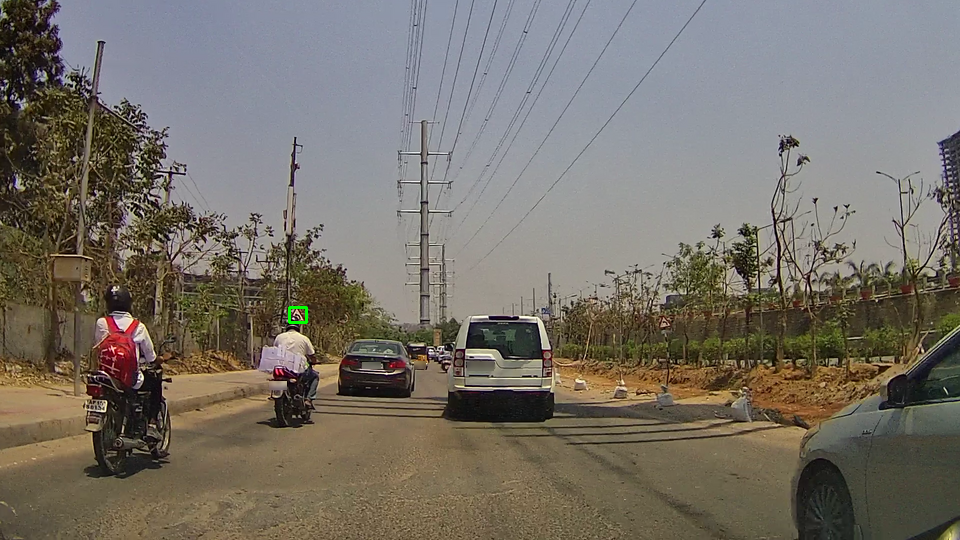

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def convert_yolo_to_pixel(image_width, image_height, yolo_x, yolo_y, yolo_width, yolo_height):
    box_x = yolo_x * image_width
    box_y = yolo_y * image_height
    box_width = yolo_width * image_width
    box_height = yolo_height * image_height

    box_xmin = int(box_x - (box_width / 2))
    box_ymin = int(box_y - (box_height / 2))
    box_xmax = int(box_x + (box_width / 2))
    box_ymax = int(box_y + (box_height / 2))

    return box_xmin, box_ymin, box_xmax, box_ymax

# Load the image
image_path = "/content/drive/MyDrive/output_f/1012_frame_703.png"
image = cv2.imread(image_path)

# Get image dimensions
image_height, image_width, _ = image.shape

# Define YOLO coordinates
yolo_x = 0.3098958333333333
yolo_y = 0.5824074074074074
yolo_width = 0.017708333333333333
yolo_height = 0.027777777777777776

# Convert YOLO to pixel coordinates
box_xmin, box_ymin, box_xmax, box_ymax = convert_yolo_to_pixel(image_width, image_height, yolo_x, yolo_y, yolo_width, yolo_height)

# Draw bounding box rectangle on the image
cv2.rectangle(image, (box_xmin, box_ymin), (box_xmax, box_ymax), (0, 255, 0), 2)

# Show the image with the bounding box
cv2_imshow( image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import os
import random
import shutil

# Set the path to the original folder containing PNG and TXT files
data_folder = "/content/drive/MyDrive/output_f"

# Set the path to the folder where the training and validation data will be saved
train_folder = "/content/drive/MyDrive/train8"
val_folder = "/content/drive/MyDrive/val8"

# Set the desired split ratio
split_ratio = 0.9  # 90% for training, 10% for validation

# Create the train and validation folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Get the list of PNG files
png_files = [file for file in os.listdir(data_folder) if file.endswith('.png')]

# Shuffle the list of PNG files
random.shuffle(png_files)

# Calculate the index to split the data
split_index = int(len(png_files) * split_ratio)

# Split the PNG files into training and validation sets
train_png_files = png_files[:split_index]
val_png_files = png_files[split_index:]

# Move the corresponding TXT files for training set
for png_file in train_png_files:
    txt_file = os.path.splitext(png_file)[0] + '.txt'
    source_png_path = os.path.join(data_folder, png_file)
    source_txt_path = os.path.join(data_folder, txt_file)
    destination_png_path = os.path.join(train_folder, png_file)
    destination_txt_path = os.path.join(train_folder, txt_file)

    print(f"Copying {png_file} and {txt_file} to the training folder.")
    try:
        shutil.copy(source_png_path, destination_png_path)
        shutil.copy(source_txt_path, destination_txt_path)
        print(f"Successfully copied {png_file} and {txt_file} to the training folder.")
    except Exception as e:
        print(f"Error copying {png_file} and {txt_file}: {str(e)}")

# Move the corresponding TXT files for validation set
for png_file in val_png_files:
    txt_file = os.path.splitext(png_file)[0] + '.txt'
    source_png_path = os.path.join(data_folder, png_file)
    source_txt_path = os.path.join(data_folder, txt_file)
    destination_png_path = os.path.join(val_folder, png_file)
    destination_txt_path = os.path.join(val_folder, txt_file)

    print(f"Copying {png_file} and {txt_file} to the validation folder.")
    try:
        shutil.copy(source_png_path, destination_png_path)
        shutil.copy(source_txt_path, destination_txt_path)
        print(f"Successfully copied {png_file} and {txt_file} to the validation folder.")
    except Exception as e:
        print(f"Error copying {png_file} and {txt_file}: {str(e)}")

Copying 842_frame_399.png and 842_frame_399.txt to the training folder.
Successfully copied 842_frame_399.png and 842_frame_399.txt to the training folder.
Copying 668_frame_732.png and 668_frame_732.txt to the training folder.
Successfully copied 668_frame_732.png and 668_frame_732.txt to the training folder.
Copying 505_frame_798.png and 505_frame_798.txt to the training folder.
Successfully copied 505_frame_798.png and 505_frame_798.txt to the training folder.
Copying 144_frame_1385.png and 144_frame_1385.txt to the training folder.
Successfully copied 144_frame_1385.png and 144_frame_1385.txt to the training folder.
Copying 868_frame_1188.png and 868_frame_1188.txt to the training folder.
Successfully copied 868_frame_1188.png and 868_frame_1188.txt to the training folder.
Copying 1403_frame_1223.png and 1403_frame_1223.txt to the training folder.
Successfully copied 1403_frame_1223.png and 1403_frame_1223.txt to the training folder.
Copying 269_frame_255.png and 269_frame_255.txt 

In [ ]:
import os

folder_path = '/content/drive/MyDrive/train8'  # Replace with the actual path to your folder

# Initialize counters
png_count = 0
txt_count = 0

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Count .png files
    if file_name.endswith('.png'):
        png_count += 1

    # Count .txt files
    elif file_name.endswith('.txt'):
        txt_count += 1

# Print the counts
print("Total number of .png files:", png_count)
print("Total number of .txt files:", txt_count)

Total number of .png files: 1800
Total number of .txt files: 1800


In [ ]:
import os

folder_path = '/content/drive/MyDrive/val8'  # Replace with the actual path to your folder

# Initialize counters
png_count = 0
txt_count = 0

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Count .png files
    if file_name.endswith('.png'):
        png_count += 1

    # Count .txt files
    elif file_name.endswith('.txt'):
        txt_count += 1

# Print the counts
print("Total number of .png files:", png_count)
print("Total number of .txt files:", txt_count)

Total number of .png files: 200
Total number of .txt files: 200


In [ ]:
import os

folder_path = '/content/drive/MyDrive/train8'  # Replace with the actual path to your folder

# Initialize variables to track PNG and TXT files
png_files = []
txt_files = []

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if file is a PNG file
    if file_name.endswith('.png'):
        png_files.append(file_name)

    # Check if file is a TXT file
    elif file_name.endswith('.txt'):
        txt_files.append(file_name)

# Check if each PNG file has a corresponding TXT file
for png_file in png_files:
    corresponding_txt_file = png_file[:-4] + '.txt'
    if corresponding_txt_file not in txt_files:
        print(f"Missing TXT file for PNG file: {png_file}")

print("Folder check complete.")

Folder check complete.


In [ ]:
import os

folder_path = '/content/drive/MyDrive/val8'  # Replace with the actual path to your folder

# Initialize variables to track PNG and TXT files
png_files = []
txt_files = []

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if file is a PNG file
    if file_name.endswith('.png'):
        png_files.append(file_name)

    # Check if file is a TXT file
    elif file_name.endswith('.txt'):
        txt_files.append(file_name)

# Check if each PNG file has a corresponding TXT file
for png_file in png_files:
    corresponding_txt_file = png_file[:-4] + '.txt'
    if corresponding_txt_file not in txt_files:
        print(f"Missing TXT file for PNG file: {png_file}")

print("Folder check complete.")

Folder check complete.


In [ ]:
pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.6/595.6 kB 22.2 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

In [ ]:
model=YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 77.4MB/s]


In [ ]:
!touch data.yaml

In [ ]:
model.train(data="/content/data.yaml",epochs=100)

Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False,

In [ ]:
infer.predict("/content/drive/MyDrive/task1test",save=True,save_txt=True,save_conf=True)

In [ ]:
import os

class_mapping = {
    0: "gap-in-median",
    1: "left-hand-curve",
    2: "right-hand-curve",
    3: "side-road-left"
}

txt_folder_path = "/content/runs/detect/predict/labels"  # Replace with the path to your txt folder
output_folder = "/content/drive/MyDrive/newtxtfilesofclasslabels"  # Replace with the path to the output folder

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get the list of text files in the folder
txt_files = [f for f in os.listdir(txt_folder_path) if f.endswith(".txt")]

for txt_file in txt_files:jhkjhk
    txt_file_path = os.path.join(txt_folder_path, txt_file)
    output_file_path = os.path.join(output_folder, txt_file)
    
    with open(txt_file_path, 'r') as file:
        content = file.readline().strip().split()
        class_id = int(content[0])
        class_name = class_mapping.get(class_id, "Unknown")
        values = content[1:]

        # Replace the class ID with the class name
        content[0] = class_name

    # Write the updated content to the output file
    with open(output_file_path, 'w') as file:
        file.write(' '.join(content))